In [1]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_results_local_lp(df, baseline_df, n_points=200):    
    # Select data points to plot
    df_plot = df.iloc[:n_points] if n_points < len(df) else df
    baseline_plot = baseline_df.iloc[:n_points] if n_points < len(baseline_df) else baseline_df
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 8))
    fig.suptitle('BESS Control Results vs Baseline', fontsize=16)
    
    # Plot 1: State of Energy
    ax1.plot(df_plot.index, df_plot['soe'], color='orange', label='With BESS')
    ax1.plot(baseline_plot.index, baseline_plot['soe'], color='gray', label='Baseline')
    ax1.set_ylabel('Energy (kWh)')
    ax1.set_title('Battery State of Energy')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Battery Action
    ax2.plot(df_plot.index, df_plot['action'], color='green', label='With BESS')
    ax2.plot(baseline_plot.index, baseline_plot['action'], color='gray', label='Baseline')
    ax2.set_ylabel('Power (kW)')
    ax2.set_title('Battery Action')
    ax2.grid(True)
    ax2.legend()
    
    # Plot 3: Net Load
    ax3.plot(df_plot.index, df_plot['net_load'], color='blue', label='With BESS')
    ax3.plot(baseline_plot.index, baseline_plot['net_load'], color='gray', label='Baseline')
    ax3.set_ylabel('Power (kW)')
    ax3.set_title('Net Load')
    ax3.grid(True)
    ax3.legend()
    
    # Plot 4: Total Load
    ax4.plot(df_plot.index, df_plot['total_load'], color='red', label='With BESS')
    ax4.plot(baseline_plot.index, baseline_plot['total_load'], color='gray', label='Baseline')
    ax4.set_ylabel('Power (kW)')
    ax4.set_title('Total Load')
    ax4.grid(True)
    ax4.legend()
    
    # Plot 5: Price
    ax5.plot(df_plot.index, df_plot['price'], color='purple', label='With BESS')
    ax5.plot(baseline_plot.index, baseline_plot['price'], color='gray', label='Baseline')
    ax5.set_ylabel('Price (€/kWh)')
    ax5.set_title('Electricity Price')
    ax5.grid(True)
    ax5.legend()
    ax5.set_xlabel('Time steps')
    
    # Plot 6: Cumulative cost
    ax6.plot(df_plot.index, df_plot['total_cost'], color='orange', label='With BESS')
    ax6.plot(baseline_plot.index, baseline_plot['total_cost'], color='gray', label='Baseline')
    ax6.set_ylabel('Cost (€)')
    ax6.set_title('Cumulative Electricity Costs')
    ax6.grid(True)
    ax6.legend()
    ax6.set_xlabel('Time steps')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

def plot_results_federated_local_lp(df_fed, df_local, baseline_df, n_points=200):
    
    # Total Cost without optimization (No BESS actions)
    total_cost_unoptimized = (df_local['price'] * df_local['net_load']).sum()
 
    # Print total costs and savings
    print("----- Optimization Summary -----")
    print(f"Total Rvenue NO Optimization: ${-total_cost_unoptimized:.2f}")
    print(f"Total Revenue Local RL: {-df_local['total_cost'].iloc[-1]:.2f} €")
    print(f"Total Revenue Federated RL: {-df_fed['total_cost'].iloc[-1]:.2f} €")
    print(f"Total Revenue LP: {baseline_df['total_cost'].iloc[-1]:.2f} €")
    print(f"Total savings: {df_local['total_cost'].iloc[-1] - df_fed['total_cost'].iloc[-1]:.2f} €")
    print("---------------------------------")
    
    # Select data points to plot
    df_local_plot = df_local.iloc[:n_points] if n_points < len(df_local) else df_local
    df_fed_plot = df_fed.iloc[:n_points] if n_points < len(df_fed) else df_fed
    baseline_plot = baseline_df.iloc[:n_points] if n_points < len(baseline_df) else baseline_df
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 8))
    fig.suptitle('BESS Control Results vs Baseline', fontsize=16)
    
    # Plot 1: State of Energy
    ax1.plot(df_local_plot.index, df_local_plot['soe'], color='green', label='Local')
    ax1.plot(df_fed_plot.index, df_fed_plot['soe'], color='red', label='Fed')
    ax1.plot(baseline_plot.index, baseline_plot['soe'], color='gray', label='Baseline')
    ax1.set_ylabel('Energy (kWh)')
    ax1.set_title('Battery State of Energy')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Battery Action
    ax2.plot(df_local_plot.index, df_local_plot['action'], color='green', label='Local')
    ax2.plot(df_fed_plot.index, df_fed_plot['action'], color='red', label='Fed')
    ax2.plot(baseline_plot.index, baseline_plot['action'], color='gray', label='Baseline')
    ax2.set_ylabel('Power (kW)')
    ax2.set_title('Battery Action')
    ax2.grid(True)
    ax2.legend()
    
    # Plot 3: Net Load
    ax3.plot(df_local_plot.index, df_local_plot['net_load'], color='green', label='Local')
    ax3.plot(df_fed_plot.index, df_fed_plot['net_load'], color='red', label='Fed')
    ax3.plot(baseline_plot.index, baseline_plot['net_load'], color='gray', label='Baseline')
    ax3.set_ylabel('Power (kW)')
    ax3.set_title('Net Load')
    ax3.grid(True)
    ax3.legend()
    
    # Plot 4: Total Load
    ax4.plot(df_local_plot.index, df_local_plot['total_load'], color='green', label='Local')
    ax4.plot(df_fed_plot.index, df_fed_plot['total_load'], color='red', label='Fed')
    ax4.plot(baseline_plot.index, baseline_plot['total_load'], color='gray', label='Baseline')
    ax4.set_ylabel('Power (kW)')
    ax4.set_title('Total Load')
    ax4.grid(True)
    ax4.legend()
    
    # Plot 5: Price
    ax5.plot(df_local_plot.index, df_local_plot['price'], color='green', label='Local')
    ax5.plot(df_fed_plot.index, df_fed_plot['price'], color='red', label='Fed')
    ax5.plot(baseline_plot.index, baseline_plot['price'], color='gray', label='Baseline')
    ax5.set_ylabel('Price (€/kWh)')
    ax5.set_title('Electricity Price')
    ax5.grid(True)
    ax5.legend()
    ax5.set_xlabel('Time steps')
    
    # Plot 6: Cumulative cost
    ax6.plot(df_local_plot.index, df_local_plot['total_cost'], color='green', label='Local')
    ax6.plot(df_fed_plot.index, df_fed_plot['total_cost'], color='red', label='Fed')
    ax6.plot(baseline_plot.index, baseline_plot['total_cost'], color='gray', label='Baseline')
    ax6.set_ylabel('Cost (€)')
    ax6.set_title('Cumulative Electricity Costs')
    ax6.grid(True)
    ax6.legend()
    ax6.set_xlabel('Time steps')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()


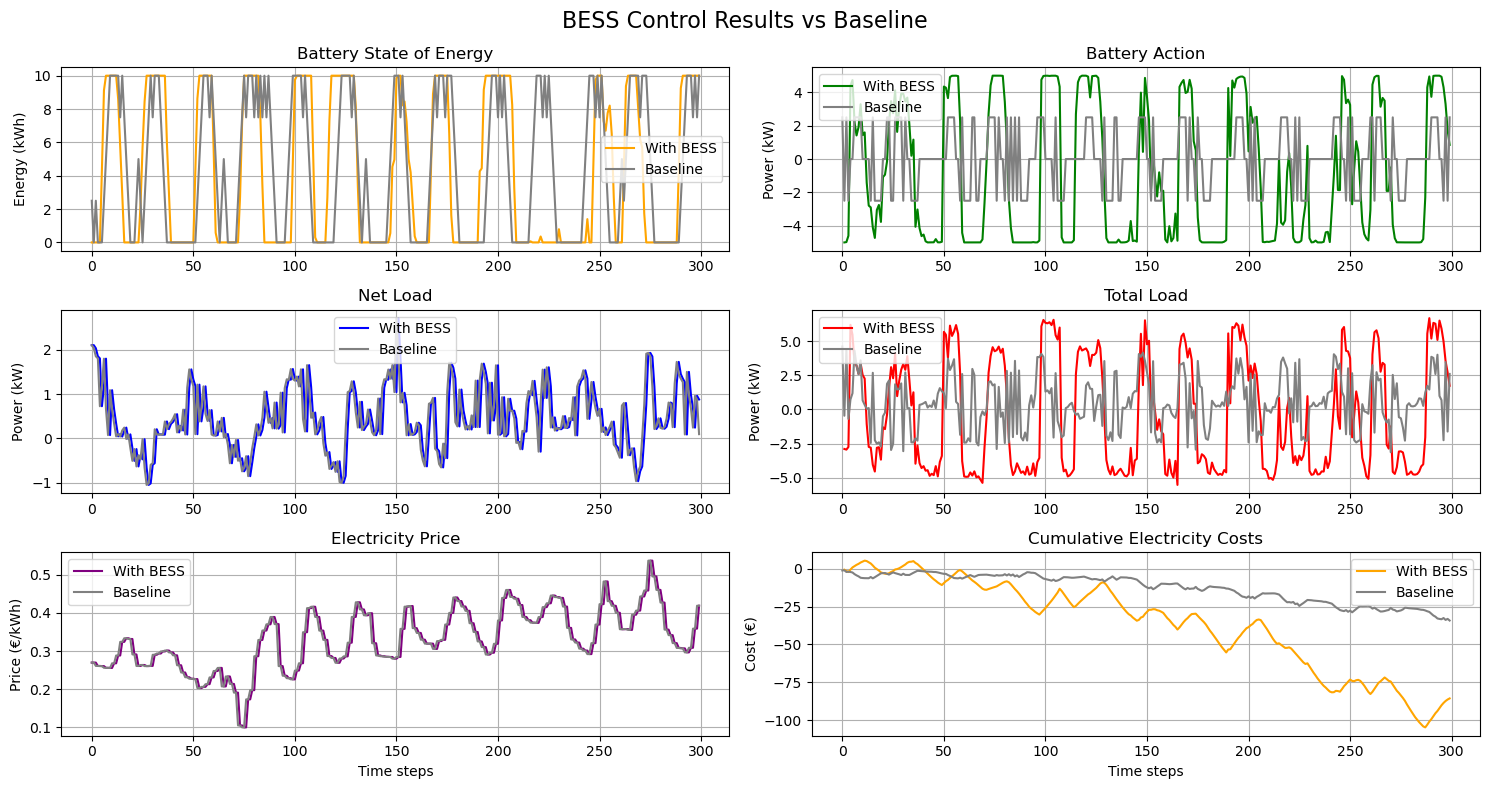

In [3]:
ll_df = pd.read_csv(f"../outputs/test/building_1_results.csv")
baseline_df = pd.read_csv(f"../outputs/baselines/LP_baseline_building1.csv", index_col=0)
baseline_df = baseline_df.iloc[:-48]
plot_results_local_lp(ll_df, baseline_df, n_points=300)

In [1]:
for id in range(0,30):

    ll_df = pd.read_csv(f"outputs/ll_v2/ll_v2building_{id+1}_results.csv")

    df_fed = pd.read_csv(f"outputs/fl_v2/building_{id+1}_results.csv")

    baseline_df = pd.read_csv(f"outputs/baselines/LP_baseline_building{id+1}.csv", index_col=0)
    baseline_df = baseline_df.iloc[:-48]

    plot_results_federated_local_lp(df_fed, ll_df, baseline_df, n_points=200)

NameError: name 'pd' is not defined